In [1]:
import pandas as pd
import numpy as np

data=pd.read_csv('data_nike_vs_addidas_unsupervised.csv')
df=pd.DataFrame(data)
df


,Product Name,Product ID,Listing Price,Sale Price,Discount,Brand,Rating,Reviews
0,Women's adidas Originals NMD_Racer Primeknit S...,AH2430,14999,7499,50,Adidas Adidas ORIGINALS,4.8,41
1,Women's adidas Originals Sleek Shoes,G27341,7599,3799,50,Adidas ORIGINALS,3.3,24
2,Women's adidas Swim Puka Slippers,CM0081,999,599,40,Adidas CORE / NEO,2.6,37
3,Women's adidas Sport Inspired Questar Ride Shoes,B44832,6999,3499,50,Adidas CORE / NEO,4.1,35
4,Women's adidas Originals Taekwondo Shoes,D98205,7999,3999,50,Adidas ORIGINALS,3.5,72
...,...,...,...,...,...,...,...,...
3263,Air Jordan 8 Retro,CI1236-100,15995,12797,0,Nike,5.0,1
3264,Nike Phantom Venom Club IC,AO0578-717,4995,3497,0,Nike,0.0,0
3265,Nike Mercurial Superfly 7 Academy TF,AT7978-414,8495,5947,0,Nike,5.0,1
3266,Nike Air Max 98,AH6799-300,0,16995,0,Nike,4.0,4


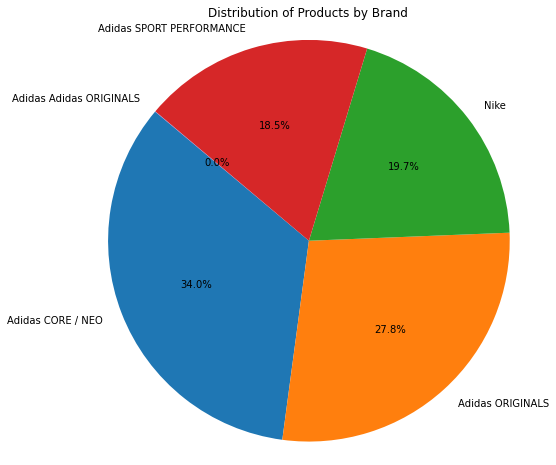

In [10]:
import matplotlib.pyplot as plt
brand_avg_ratings = df.groupby('Brand')['Rating'].mean().reset_index()

brand_product_counts = df['Brand'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(brand_product_counts, labels=brand_product_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Products by Brand')

# Display the chart
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


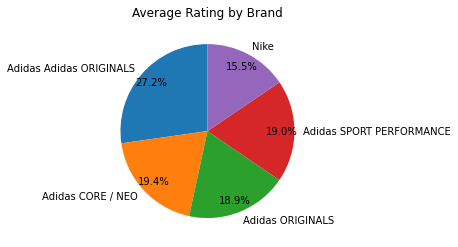

In [14]:
brand_avg_ratings = df.groupby('Brand')['Rating'].mean()

# Create a donut chart for the average ratings
fig, ax = plt.subplots()
ax.pie([1], radius=0.75, colors=['white'])
ax.pie(brand_avg_ratings, labels=brand_avg_ratings.index, autopct='%1.1f%%', startangle=90, pctdistance=0.85)
ax.set(aspect="equal")
ax.set_title('Average Rating by Brand')

# Display the chart
plt.show()

In [2]:
df.isna()

,Product Name,Product ID,Listing Price,Sale Price,Discount,Brand,Rating,Reviews
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
3263,False,False,False,False,False,False,False,False
3264,False,False,False,False,False,False,False,False
3265,False,False,False,False,False,False,False,False
3266,False,False,False,False,False,False,False,False


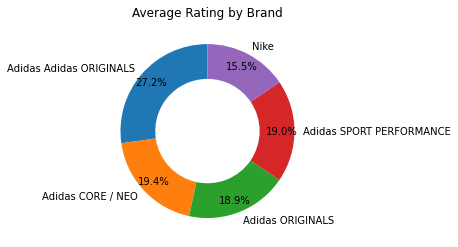

In [17]:

brand_avg_ratings = df.groupby('Brand')['Rating'].mean()

# Create a donut chart for the average ratings
fig, ax = plt.subplots()
ax.pie(brand_avg_ratings, labels=brand_avg_ratings.index, autopct='%1.1f%%', startangle=90, pctdistance=0.85, wedgeprops=dict(width=0.4))
ax.set(aspect="equal")
ax.set_title('Average Rating by Brand')

# Display the chart
plt.show()









In [3]:
df1=df[['Product Name','Sale Price','Rating','Reviews']]
df1

,Product Name,Sale Price,Rating,Reviews
0,Women's adidas Originals NMD_Racer Primeknit S...,7499,4.8,41
1,Women's adidas Originals Sleek Shoes,3799,3.3,24
2,Women's adidas Swim Puka Slippers,599,2.6,37
3,Women's adidas Sport Inspired Questar Ride Shoes,3499,4.1,35
4,Women's adidas Originals Taekwondo Shoes,3999,3.5,72
...,...,...,...,...
3263,Air Jordan 8 Retro,12797,5.0,1
3264,Nike Phantom Venom Club IC,3497,0.0,0
3265,Nike Mercurial Superfly 7 Academy TF,5947,5.0,1
3266,Nike Air Max 98,16995,4.0,4


In [5]:

    try:
        min_price = float(input("Enter the minimum price: "))
        max_price = float(input("Enter the maximum price: "))
        
        if min_price >= max_price:
            print("Invalid price range. Minimum price must be less than maximum price.")
    
    except ValueError:
        print("Invalid input. Please enter valid numeric values.")
    value_to_remove=0.0
    df1=df1[df1['Rating']!=value_to_remove]         
    df1=df1[(df1['Sale Price']>=min_price)& (df1['Sale Price']<=max_price)]
    #df1=df1[df1["Sale Price"].between(max_price,min_price)]
    df1 
    df1=df1[ df1.Rating==df1.Rating.max()]
    df1
    best_products = {}
    unique_ratings = df1['Rating'].unique()

# Iterate over unique rating values
    for rating in unique_ratings:
        subset = df1[df1['Rating'] == rating]
    
    # Find the row with the maximum reviews for this rating
        max_reviews = subset['Reviews'].max()
    
    # Find the product name corresponding to the row with the maximum reviews
        product_with_max_reviews = subset[subset['Reviews'] == max_reviews]['Product Name'].values[0]
    
    # Store the product name and max review count in the dictionary
        best_products[rating] = {'Product Name': product_with_max_reviews, 'Max Reviews': max_reviews}


    #print(df1['Product Name'])
best_products


Enter the minimum price: 799
Enter the maximum price: 5888


{5.0: {'Product Name': "Men's adidas Running Asweego Shoes",
  'Max Reviews': 99}}